# Data Mining Project

Authors:
    Di Nosse Daniele Maria,
    Lasala Angelo,
    Paradiso Raffaele

In [2]:
%matplotlib inline
import math
import re # regular expression
import numpy as np
import pandas as pd
import scipy
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

# Operazioni base ed operazioni preliminari

Importare il DataFrame

In [ ]:
df = pd.read_csv('Train+Test.csv') #(delimiter='\t')
df.shape

Operazioni base su DataFrame

In [ ]:
# print(df.head(3)) # Print prime 3 righe
# print(df.tail(3)) # Print ultime 3 righe
# print(df.columns) # Print attribute
# print(df['Age'][0:5]) # Print una sola colonna e prime 5 righe
# print(df[['Age', 'JobLevel']]) # Print più colonne
# print(df.iloc[1:4]) # Stampa intere righe (ultima esclusa)
# print(df.iloc[1,1]) # Stampa un elemento preciso in questo caso riga 1 colonna 1
# print(df.loc[df['Attrition'] == 'Yes']) # Finding a specific value for the attribute in a dataset
# print(df.loc[df['Attrition'].str.contains('Yes|no', flags=re.I, regex=True)])
# print(df.dtypes) # Stampa il tipo degli attributi
# print(df.shape) # Shape del DataFrame
# print(df.sort_values(['Age', 'YearsWithCurrManager'], ascending=[1,0])) #sorted data (NaN in coda)
# print(df.describe()) # print count,mean,std,min,25%,50%,75%,max
# print(df.loc[~df['MaritalStatus'].str.contains('Single')]) # Drop tutte le righe con single in marital status
# print(df['Age'].unique()) # valori non ripetuti attributo "Age"
# print(df.groupby(['Age']).mean().sort_values('YearsWithCurrManager', ascending=False))# valori divisi in gruppi per età

# df['T'] = df[''] + df[''] # Addizionare colonne
# df['T'] = df.iloc[:, i:j].sum(axis=1) #axis=1 somma orizzontalmente, =0 verticalmente
# df.to_csv = ('.csv', index=False)
# df.to_excel = ('.xlsx', index=False)
# df.to_csv = ('.txt', index=False, sep='\t')

#Stampa minimo e massimo dei valori nelle singole colonne e i loro range:
# 1° modo
# l = [0,3,5,6,8,10,11,12,14,16,17,18,21,22,23,24,25,26,27,28,29,30,31,32]
# for i in range(len(l)):
#    print(f' {l[i]} : min e max di {df.columns[l[i]]} sono {min(df.values[:,l[i]])} e
#                     {max(df.values[:,l[i]])}. Range -->
#                     {max(df.values[:,l[i]])-min(df.values[:,l[i]])}.')

# 2° modo
# print(df.min())
# print(numeric.max() - numeric.min())
# print((numeric.max() - numeric.min()).idxmax())
# print(df[(numeric.max() - numeric.min()).idxmax()])

# etamin = (df[(df['Age'] > 18) & (df['Age'] < 24)]) # Solo le righe con valori di età >17 & < 19
# etamin = etamin.reset_index(drop=True) # Resetta indici

#conoscere i valori max e min del guadagno mensile di gruppi organizzati per relazione coniugale
# print(df.groupby(['MaritalStatus'], sort=False)['MonthlyIncome'].max())
# print(df.groupby(['MaritalStatus'], sort=False)['MonthlyIncome'].min())

#sub plot organizzati in matrici, una sola figura più plot
# figure, axes = plt.subplots(4, 4)
# # df['Age'].plot(ax=axes[0])
# for i in range(0,4):
#     for j in range(0,4):
#         df['Age'].plot(ax=axes[i,j])

## Statistica

In [ ]:
df.replace({'EnvironmentSatisfaction':{1 : 'Low', 2 : 'Medium',
                                       3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'JobInvolvement':{1 : 'Low', 2 : 'Medium',
                              3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'JobSatisfaction':{1 : 'Low', 2 : 'Medium',
                               3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'RelationshipSatisfaction':{1 : 'Low', 2 : 'Medium',
                                        3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'Education':{1 : 'Below College', 2 : 'College',
                         3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'}},inplace=True)
df.replace({'WorkLifeBalance':{1 : 'Bad', 2 : 'Good',
                               3 : 'Better', 4 : 'Best'}},inplace=True)
df.replace({'PerformanceRating':{1 : 'Low', 2 : 'Good',
                                 3 : 'Excellent', 4 : 'Outstanding'}},inplace=True)
df.replace({'JobLevel':{1 : '1', 2 : '2', 3 : '3', 4 : '4', 5 : '5'}},inplace=True)

# df.to_excel('NewDataFrame.xlsx') # NUOVO DATA FRAME MODIFICATO


**JobLevel** --> valori numerici ma chiaramente categorici,
non abbiamo ulteriori informazioni, chiediamo aiuto, per piacere rispondete. stop.
**TotalWorkingYear** --> non ha molto senso a nostro avviso
cioè a 18 anni non puoi aver lavorato una media di 8 anni(QUALITÀ BASSA)

In [ ]:
# p = df['TrainingTimesLastYear'].value_counts(normalize=True) * 100 # percent. degli attributi categ.


# categorical = df.select_dtypes(exclude = 'number') # SELEZIONA SOLO LE COLONNE CATEGORICHE
# numeric = df.select_dtypes('number') # SELEZIONA SOLO LE COLONNE NUMERICHE
# print(categorical.iloc[0]) # PRINT DELLA PRIMA RIGA DI CATEGORICAL

**Matrice di Correlazione**

In [ ]:
# corrmatrix = df.corr()
# print(corrmatrix)
# for index in range(len(corrmatrix.columns)): # Iteration for each columns
#     vecmax = corrmatrix.iloc[index]
#     vecmax2 = [i for i in vecmax if i < 1]
#     print(max(vecmax2))
# corrmatrix.to_excel('MatriceDiCorrelazione.xlsx') # ESPORTA MATRICE CORRELAZIONE
# pd.plotting.scatter_matrix(df.iloc[:,:], diagonal='kde') # PLOT MATRICE SCATTER
# plt.show()

# Missing Values

**ATTRIBUTI CATEGORICI**

Nell'attributo Business Travel c'è una frequenza di NaN pari al circa 9%. Siccome la granulosità dell'attributo ricopre in maniera completa lo spettro delle classi plausibilmente attribuibili a tale attributo abbiamo deciso di valutare se ci fosse correlazione con gli altri attributi presenti nel data frame. Per quanto riguarda quelli numerici, abbiamo utilizzato gli scatter plot, mentre per quelli nominali abbiamo eseguito il test di indipendenza del chi quadro. In entrambi i casi non si evincono correlazioni significative (p value > 0.05 sempre). Di conseguenza DROP THE COLUMN

In [ ]:
print(categorical.isnull().sum())

In [ ]:
for index, columns in categorical.iteritems():
    if index != 'BusinessTravel':
        ct = pd.crosstab(categorical['BusinessTravel'], categorical[index], margins=True)
        obs = np.array([ct.iloc[0][0:4].values, ct.iloc[1][0:4].values])
        print('BusinessTravel', index, 'p value is', scipy.stats.chi2_contingency(obs)[0:3][1])


In [ ]:
###########statistica = df.describe()
#############statistica.to_excel('statistica.xlsx') #esporta la tabella in excel
df = df.drop(columns=['StandardHours']) # Rimuovere colonne
df = df.drop(columns=['Over18'])
df = df.drop(columns=['BusinessTravel'])
############p = df['TrainingTimesLastYear'].value_counts(normalize=True) * 100 # percentntuale degli attributi categorici


Gestiamo i restanti missing values per gli attributi categorici: Gender e PerformanceRating.

Per quanto riguarda PerformanceRating, aggiungiamo una nuova classe 'MISSING', poiché abbiamo notato che la granulosità dell'attributo non ricopre tutto lo spettro plausibile. I valori di MISSING presupponiamo possano appartenere ad una classe di ordine inferiore a Excellent

In [ ]:
for index in range(len(df['PerformanceRating'])):
    if type(df['PerformanceRating'][index]) != type('peppino'):
        df['PerformanceRating'][index] = 'MISSING'
print(df['PerformanceRating'])
    


In [ ]:
for index in range(len(df['Gender'])):
    if type(df['Gender'][index]) != type('peppino'):
        n = np.random.random()
        if n < 0.5721:
            df['Gender'][index] = 'Male'
        else:
            df['Gender'][index] = 'Female'
        
print(df['Gender']) 
df['Gender'].value_counts(normalize=True) * 100


**ATTRIBUTI NUMERICI**

In [ ]:
print(df.isnull().sum())

**Attenzione: Runnare prima le prime celle, quelle relative agli istogrammi, poi le successive**

I missing values negli attributi numerici sono gestiti nel seguente modo:
1. Valutiamo le frequenze relative agli intervalli scelti come bins negli istrogrammi
2. Sostituiamo i missing values con valori estratti dalla stessa distribuzione, ovvero aggiungiamo ad   ogni bin un numero pari alla mediana del bin con una probabilità uguale alla frequenza di quel bin

**Age**

In [ ]:
plt.hist(df['Age'], bins=9,edgecolor='k')
plt.xticks(np.arange(18,60+6,7))
data = df['Age'].fillna(0)
bins = np.arange(18,60,7)
histdata = np.histogram(data,bins)
print(histdata)
frequencies = histdata[0]/1258
valore_medio = histdata[1] + 3.5 
print(a, valore_medio)

In [ ]:
index_list = df['Age'].index[df['Age'].apply(np.isnan)]
for index in index_list:
        n = np.random.random()
        if n < 0.043:
            df['Age'][index] = 21.5
        if (n>0.043) and (n<0.215):
            df['Age'][index] = 27.5
        if (n>0.215) and (n<0.485):
            df['Age'][index] = 33.5
        if (n>0.485) and (n<0.706):
            df['Age'][index] = 39.5
        if (n>0.706) and (n<0.853):
            df['Age'][index] = 45.5
        if (n>0.853) and (n<0.941):
            df['Age'][index] = 51.5
        if (n>0.941) and (n<1.):
            df['Age'][index] = 57.5

**MonthlyIncome**

In [ ]:
plt.hist(df['MonthlyIncome'], bins=9,edgecolor='k')
plt.xticks(np.arange(1009,19999+2110,2110))
data = df['MonthlyIncome'].fillna(0)
bins = np.arange(1009,19999,2110)
histdata = np.histogram(data,bins)
print(histdata)
frequencies = histdata[0]/1190
valore_medio = histdata[1] + 1055 
print(a, valore_medio)

In [ ]:
index_list = df['MonthlyIncome'].index[df['MonthlyIncome'].apply(np.isnan)]
for index in index_list:
        n = np.random.random()
        if n < 0.271:
            df['MonthlyIncome'][index] = 2064
        if (n>0.271) and (n<0.541):
            df['MonthlyIncome'][index] = 4174
        if (n>0.541) and (n<0.715):
            df['MonthlyIncome'][index] = 6284
        if (n>0.715) and (n<0.777):
            df['MonthlyIncome'][index] = 8394
        if (n>0.777) and (n<0.854):
            df['MonthlyIncome'][index] = 10504
        if (n>0.854) and (n<0.893):
            df['MonthlyIncome'][index] = 12614
        if (n>0.893) and (n<0.933):
            df['MonthlyIncome'][index] = 14724
        if (n>0.933) and (n<0.951):
            df['MonthlyIncome'][index] = 16834
        if (n>0.951) and (n<1.):
            df['MonthlyIncome'][index] = 18944

**TrainingTimesLastYear**

In [ ]:
plt.hist(df['TrainingTimesLastYear'], bins=(np.arange(0,7+1.5,)-0.5),edgecolor='k')
plt.xticks(np.arange(0,7,1))
data = df['TrainingTimesLastYear'].fillna(10)
bins = np.arange(0,8,1)
histdata = np.histogram(data,bins)
print(histdata)
frequencies = histdata[0]/1178
valore_medio = histdata[1] 
print(frequencies, valore_medio)

In [ ]:
index_list = df['TrainingTimesLastYear'].index[df['TrainingTimesLastYear'].apply(np.isnan)]
for index in index_list:
        n = np.random.random()
        if n < 0.0373:
            df['TrainingTimesLastYear'][index] = 0
        if (n>0.0373) and (n<0.087):
            df['TrainingTimesLastYear'][index] = 1
        if (n>0.087) and (n<0.454):
            df['TrainingTimesLastYear'][index] = 2
        if (n>0.454) and (n<0.786):
            df['TrainingTimesLastYear'][index] = 3
        if (n>0.786) and (n<0.866):
            df['TrainingTimesLastYear'][index] = 4
        if (n>0.866) and (n<0.956):
            df['TrainingTimesLastYear'][index] = 5
        if (n>0.956) and (n<1.):
            df['TrainingTimesLastYear'][index] = 6

**YearsAtCompany**

In [ ]:
plt.hist(df['YearsAtCompany'], bins=8,edgecolor='k')
plt.xticks(np.arange(0,45,5))
data = df['YearsAtCompany'].fillna(200)
bins = np.arange(0,45,5)
histdata = np.histogram(data,bins)
print(histdata)
frequencies = histdata[0]/1396
valore_medio = histdata[1] + 2.5
print(frequencies, valore_medio)

In [ ]:
index_list = df['YearsAtCompany'].index[df['YearsAtCompany'].apply(np.isnan)]
for index in index_list:
        n = np.random.random()
        if n < 0.396:
            df['YearsAtCompany'][index] = 2.5
        if (n>0.396) and (n<0.753):
            df['YearsAtCompany'][index] = 7.5
        if (n>0.753) and (n<0.894):
            df['YearsAtCompany'][index] = 12.5
        if (n>0.894) and (n<0.938):
            df['YearsAtCompany'][index] = 17.5
        if (n>0.938) and (n<0.981):
            df['YearsAtCompany'][index] = 22.5
        if (n>0.981) and (n<0.987):
            df['YearsAtCompany'][index] = 27.5
        if (n>0.989) and (n<0.995):
            df['YearsAtCompany'][index] = 32.5
        if (n>0.995) and (n<1.):
            df['YearsAtCompany'][index] = 37.5

Data Frame senza i Missing Values

In [ ]:
#df.to_csv('DataFrameWM.csv', index = False)

In [3]:
df = pd.read_csv('DataFrameWM.csv')
df.shape

(1470, 30)

# Matrici di Correlazione

**Attributi numerici**

                              Age  DailyRate  DistanceFromHome  HourlyRate  \
Age                      1.000000  -0.025329          0.003265    0.010005   
DailyRate               -0.025329   1.000000         -0.004985    0.023381   
DistanceFromHome         0.003265  -0.004985          1.000000    0.031131   
HourlyRate               0.010005   0.023381          0.031131    1.000000   
JobLevel                 0.034007   0.002966          0.005303   -0.027853   
MonthlyIncome            0.362766  -0.009286         -0.006613    0.011455   
MonthlyRate              0.040018  -0.032182          0.027473   -0.015297   
NumCompaniesWorked       0.005553   0.038153         -0.029251    0.022157   
PercentSalaryHike       -0.015101   0.022704          0.040235   -0.009062   
StockOptionLevel         0.027818   0.042143          0.044872    0.050263   
TotalWorkingYears        0.029218   0.014515          0.004628   -0.002334   
TrainingTimesLastYear    0.019451   0.001543          0.006330  

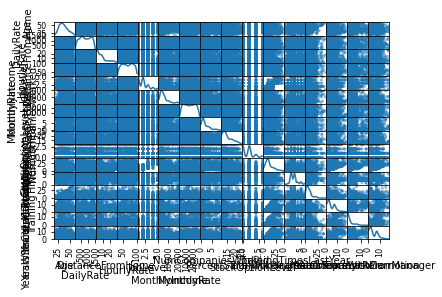

In [4]:
corrmatrix = df.corr()
print(corrmatrix)
for index in range(len(corrmatrix.columns)): # Iteration for each columns
    vecmax = corrmatrix.iloc[index]
    vecmax2 = [i for i in vecmax if i < 1]
    print(max(vecmax2))
corrmatrix.to_excel('MatriceDiCorrelazione.xlsx') # ESPORTA MATRICE CORRELAZIONE
pd.plotting.scatter_matrix(df.iloc[:,:], diagonal='kde') # PLOT MATRICE SCATTER
plt.show()

**Attributi categorici**

Valutiamo i p value per gli attributi categorici

In [12]:
categorical = df.select_dtypes(exclude = 'number')
print(categorical.columns)

Index(['Attrition', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')


In [46]:
categorical = df.select_dtypes(exclude = 'number')
row = np.array(0)
for index in categorical.columns[4:]:
    if index != 'JobRole':
        ct = pd.crosstab(categorical['JobRole'], categorical[index], margins=True)
        obs = np.array([ct.iloc[0][0:4].values, ct.iloc[1][0:4].values])
        pvalue = scipy.stats.chi2_contingency(obs)[0:3][1]
        row = np.append(row, pvalue)
        print('JobRole', index, 'p value is', pvalue)
print(row)

JobRole EnvironmentSatisfaction p value is 0.6056976107575627
JobRole Gender p value is 0.6620510973937662
JobRole JobInvolvement p value is 0.9529268883271678
JobRole JobSatisfaction p value is 0.08408670778166073
JobRole MaritalStatus p value is 0.6992036101938701
JobRole OverTime p value is 0.9060572486803802
JobRole PerformanceRating p value is 0.7429732829632951
JobRole RelationshipSatisfaction p value is 0.24628103727675701
JobRole WorkLifeBalance p value is 0.09998550377934101
[0.         0.60569761 0.6620511  0.95292689 0.08408671 0.69920361
 0.90605725 0.74297328 0.24628104 0.0999855 ]


# Outliers

 **Grab Test**

In [ ]:
from outliers import smirnov_grubbs as grubbs

In [ ]:
for index in df.select_dtypes('number'):
    outremove = grubbs.max_test_indices(df.select_dtypes('number')[index], alpha=0.05)
    outremove1 = grubbs.max_test_outliers(df.select_dtypes('number')[index], alpha=0.05)
    #print(df.select_dtypes('number').shape, outremove.shape)
    print(index, outremove, outremove1)

Il parametro alpha rappresenta il livello di significatività. 
I nostri dati, comunque, non seguono una distribuzione gaussiana, condizione necessaria per poter utilizzare tale test

**Boxplot**


In [ ]:
df = pd.read_csv('DataFrameWM.csv')
for element in df.select_dtypes('number'):
    plt.figure()
    df.boxplot(element, return_type=None)
    

Visualizzati i BoxPlot, eliminiamo gli outliers

In [ ]:
fil = (df['TotalWorkingYears'] > 28)
print(len(list(df.index[fil == True])))
#df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['YearsWithCurrManager'] > 14)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['YearsSinceLastPromotion'] > 9)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['MonthlyIncome'] > 16659)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['NumCompaniesWorked'] > 8)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['StockOptionLevel'] > 2)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['TrainingTimesLastYear'] > 4)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

fil = (df['TrainingTimesLastYear'] < 1)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['YearsAtCompany'] > 18)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
fil = (df['YearsInCurrentRole'] > 14)
print(len(list(df.index[fil == True])))
df.drop(list(df.index[fil == True]), inplace=True)

In [ ]:
df.shape

Nuovo Data Frame senza gli outliers

In [ ]:
df.to_csv('DataFrameClustering.csv')

**Principal Component Analysis**

In [ ]:
color_list=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for val in df.select_dtypes(exclude = 'number'):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    x0 = df.select_dtypes('number').values
    x1 = StandardScaler().fit_transform(x0)
    pca = PCA(n_components = 3)
    principalComponents = pca.fit_transform(x1)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                'principal component 2', 'principal component 3'])
    finalDf = pd.concat([principalDf, df[[val]]], axis = 1)
    targets = list(pd.unique(df[val]))
    color = color_list[0:len(targets)]

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[val] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                    finalDf.loc[indicesToKeep, 'principal component 2'],
                    finalDf.loc[indicesToKeep, 'principal component 3'],
                    c = color, s=50)
    plt.legend(targets)
    print(pca.explained_variance_ratio_)

Siccome la somma delle frazioni della varianza conservata per le prime 3 componenti principali non arriva nemmeno a 0.5 (circa 0.4), abbiamo concluso che tale approccio non è utilizzabile per il nostro dataframe

# Viasulizzazione dei dati

**Scatter plot**

In [ ]:
for index_n, columns in numeric.iteritems():
    if index_n !='Age':
        for index, columns in categorical.iteritems():
            for c in categorical[index].unique():
                    dfc = df[df[index] == c]
                    plt.scatter(dfc['Age'], dfc[index_n], label=c)
            plt.legend(bbox_to_anchor=(1,1))
            plt.xlabel('Age')
            plt.title('Attribute: '+index)
            plt.ylabel(index_n)
            plt.show()
for index, columns in categorical.iteritems():
    for c in categorical[index].unique():
        dfc = df[df[index] == c]
        plt.scatter(dfc['YearsInCurrentRole'], dfc['YearsWithCurrManager'], label=c)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

# Clustering

In [ ]:
df = pd.read_csv('DataFrameClustering.csv')
print(df.shape)

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

La prima cosa da fare è trasformare i dati in maniera tale da evitare qualunque bias dovuto ai differenti range negli attributi numerici. I metodi più usati sono lo Z-Score e MinMax

In [ ]:
# scaler.transform(numeric.head().values)
numeric = df.select_dtypes('number')
scaler = MinMaxScaler()
X = scaler.fit_transform(numeric.values)

**K-MEANS**

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=5, max_iter=300)
kmeans.fit(X)
# np.unique(kmeans.labels_, return_counts=True) # grandezza di ogni cluster
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
# print(dict(zip(bins, hist))) 
i = 0
for index, columns in numeric.iteritems():
    for index_n, columns in numeric.iteritems():
        if index != index_n:
            #print(np.unique(dbscan.labels_, return_counts = True))
            plt.scatter(numeric[index_n], numeric[index], c=kmeans.labels_, s=30)
            plt.xlabel(index_n)
            plt.ylabel(index)
            i += 1
            plt.show()
            print(i)

**Centroidi K-Means**

In [ ]:
# kmeans.cluster_centers_   # centroidi
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(df['Age'], df['DailyRate'], c = kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s = 200, marker='*', c='k')
plt.show()

**SSE and Clustering Validation**

La silhouette è un indicatore della bontà della clusterizzazione. E' un numero compreso fra -1 e +1 e sta ad indicare quanto i valori di un cluster sono simili agli altri appartenenti allo stesso cluster e dissimili dagli altri punti degli altri cluster. Più è vicino a +1, più la clusterizzazione ha avuto successo.

Si può calcolare con una qualunque metrica.
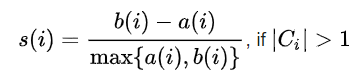

In [ ]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

Knee Method per stimare il miglior numero K di cluster

In [ ]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.show()

# HIEARCHICAL

In [ ]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.5, truncate_mode='level')
plt.savefig('myimage.svg', format='svg', dpi=1200)

# DB SCAN

In [ ]:
numeric = df.select_dtypes('number')

In [ ]:
dbscan = DBSCAN(eps=1.1, min_samples=10)
dbscan.fit(X)
#np.unique(dbscan.labels_, return_counts=True) # grandezza dei cluster. -1: Noisy Point
for val in numeric:
    plt.scatter(numeric['Age'], numeric[val], c=dbscan.labels_)
    plt.xlabel('Age')
    plt.ylabel(f'{val}')
    plt.show()

Clustering Validation

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

**Determinazione di eps**

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
dist = squareform(dist) #distance matrix given the vector dist
k = 10
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' %k)
plt.xlabel('sorted distances')
plt.grid(True)
plt.show()